Reference: https://www.youtube.com/watch?v=r9IqwpMR9TE
- made modifications and notes

⭐ CUDA Enabled GPUS:
      https://developer.nvidia.com/cuda-gpus

- in google colab, conda-toolkit is already installed for you.
- if you are running on AI/ML servers, best way to install conda-toolkit is to just install pytorch in your virutal env:

```bash
conda install -c pytorch pytorch
```  

In [ ]:
!nvidia-smi

Thu Mar 13 15:02:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
!nvidia-smi --list-gpus

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-dd9828a3-9ae0-63e4-47a8-c92658f1fe7e)


In [ ]:
!nvidia-smi -q


==============NVSMI LOG==============

Timestamp                                 : Fri Mar 14 01:37:53 2025
Driver Version                            : 550.54.15
CUDA Version                              : 12.4

Attached GPUs                             : 1
GPU 00000000:00:04.0
    Product Name                          : NVIDIA A100-SXM4-40GB
    Product Brand                         : NVIDIA
    Product Architecture                  : Ampere
    Display Mode                          : Enabled
    Display Active                        : Disabled
    Persistence Mode                      : Disabled
    Addressing Mode                       : None
    MIG Mode
        Current                           : Disabled
        Pending                           : Disabled
    Accounting Mode                       : Disabled
    Accounting Mode Buffer Size           : 4000
    Driver Model
        Current                           : N/A
        Pending                           : N/A
    Serial 

## how many cores does the GPU have ?

In [ ]:
!pip -q install pycuda

In [ ]:
import pycuda.driver as cuda
cuda.init()
device = cuda.Device(0)
print(f"GPU cores: {device.get_attribute(cuda.device_attribute.MULTIPROCESSOR_COUNT) * 64}")

GPU cores: 6912


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
# Query CPU information
print("CPU Information is shown below:")
!cat /proc/cpuinfo | grep 'model name' | uniq

CPU Information is shown below:
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
import psutil

# Check memory usage
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 2.1%


## Now let's compare matrix multiplication with CPU & GPU

In [ ]:
import torch

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("using", device, "device")

using cuda device


In [ ]:
import time

matrix_size = 32*512 # 32 is batch size

x = torch.randn(matrix_size, matrix_size)
y = torch.randn(matrix_size, matrix_size)



In [ ]:
x.size()

torch.Size([16384, 16384])

### test with cpu now

In [ ]:
print("************ CPU SPEED ***************")
start = time.time()
result = torch.matmul(x,y)
print(time.time() - start)
print("verify device:", result.device)



************ CPU SPEED ***************
11.337727785110474
verify device: cpu


### test with gpu now

In [ ]:
x_gpu = x.to(device)
y_gpu = y.to(device)
torch.cuda.synchronize() # freeze the CPU, so, it does not give you results till GPU is done


for i in range(3): # repeat the speed test 3 times.  1st time always takes more time
    print("************ GPU SPEED ***************")
    start = time.time()
    result_gpu = torch.matmul(x_gpu,y_gpu)
    torch.cuda.synchronize() # freeze the CPU again
    print(time.time() - start)
    print("verify device:", result_gpu.device)

************ GPU SPEED ***************
0.7221636772155762
verify device: cuda:0
************ GPU SPEED ***************
0.46138834953308105
verify device: cuda:0
************ GPU SPEED ***************
0.4611067771911621
verify device: cuda:0


# **Multi GPU Training with NCCL**

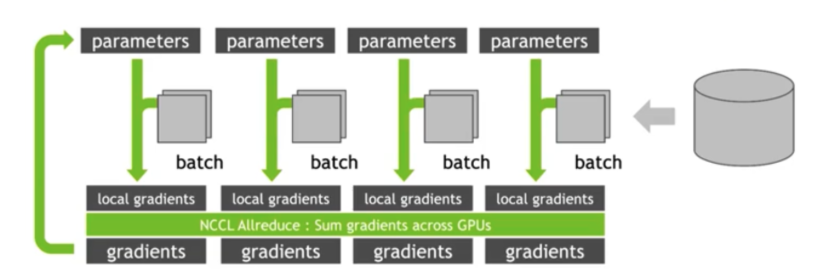